# Linear least squares fitting quiz

Given a linear model $y = ax + b$, does fitting by minimizing error along Y axis $\sum_i (y(x_i) - y_i)^2$
yield different result from minimizing along X axis $\sum_i(x(y_i) - x_i)^2$?

In [85]:
%matplotlib inline
import numpy as np
import numpy.linalg
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from operator import add
from functools import reduce

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size': 15})
rc('text', usetex=True)

In [86]:
def true_model(x):
    return x
def noisy_model(x):
    return true_model(x) + np.random.normal(0, 0.2, np.shape(x))
def inverse_model(y):
    return y

In [87]:
x = np.arange(0, 1, 0.05)
y = noisy_model(x)

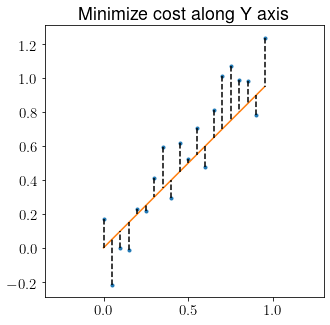

In [88]:
plt.subplots(figsize=(5,5))
plt.plot(x, y, '.')
plt.plot(x, true_model(x))
for px, py in zip(x,y):
    plt.plot([px, px], [py, true_model(px)], '--k')
plt.title("Minimize cost along Y axis")
plt.axis("equal")
plt.savefig("../statistics/images/linear_fit_y.pdf")

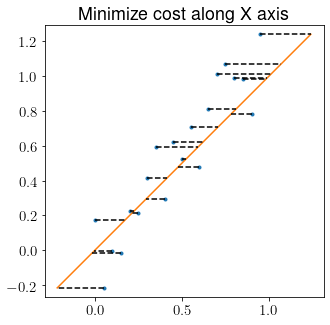

In [89]:
plt.subplots(figsize=(5,5))
plt.plot(x, y, '.')
mi, ma = min(y), max(y)
plt.plot(inverse_model([mi, ma]), [mi, ma])
for px, py in zip(x,y):
    plt.plot([px, inverse_model(py)], [py, py], '--k')
plt.title("Minimize cost along X axis")
plt.axis("equal")
plt.savefig("../statistics/images/linear_fit_x.pdf")

\begin{align}
y&=ax &
D&=\sum_{i=0}^n (y(x_i) - y_i)^2
\end{align}

$$
X_{ij} = a_i x_i^j
$$

In [93]:
x = [0, 0, 1, 1]
y = [0, 1, 0, 1]
#x = [0, 0.5, 0.5, 0, 1, 0, 1, 1]
#y = [0, 0, 1, 1, 0, 0.5, 0.5, 1]
a = np.vstack([x, np.zeros(len(x))]).T
print(a)
d = np.linalg.lstsq(a, y, rcond=None)[0]
print(d)

[[0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]]
[0.5 0. ]


In [94]:
a2 = np.vstack([y, np.zeros(len(y))]).T
print(a2)
d2 = np.linalg.lstsq(a2, x, rcond=None)[0]
print(d2)

[[0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]]
[0.5 0. ]


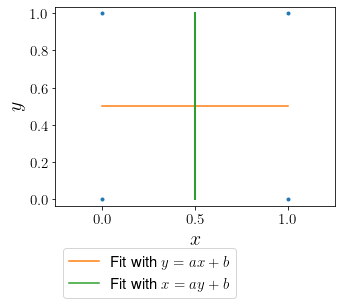

In [98]:
plt.subplots(figsize=(5,5))
plt.plot(x, y, '.')
plt.plot(x, [d[1] * xx + d[0] for xx in x], label="Fit with $y=ax+b$")
plt.plot([d[1] * xx + d[0] for xx in y], y, label="Fit with $x=ay+b$")
plt.axis("equal")
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.legend(loc="lower left", fontsize=15, bbox_to_anchor=(0, -0.5))
plt.tight_layout()
plt.savefig("../statistics/images/linear_quiz_example.pdf")

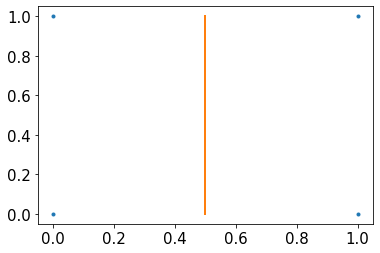

In [63]:
plt.plot(x, y, '.')
plt.plot([d[1] * xx + d[0] for xx in y], y)